# Stats sur 5 ans

In [1]:
# Répertoire du fichier en local
CT_DIR_DATA = 'C:/Users/Mscao/OneDrive - INTESCIA/export/'

from datetime import datetime, timedelta
DTREF = datetime(2018,4,1)

## Chargement

In [2]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

In [3]:
# Lecture
df = pd.read_csv(CT_DIR_DATA + 'stats_5_ans_PROD.csv', sep=";", na_values=r"\0")
print(df.shape)
print(len(set(df.siren)), 'SIREN')

y0 = str(DTREF.year)
df = df.rename(columns={'indiScore': 'indiScore'+y0, 'procol': 'procol'+y0, 'indiScoreDate': 'indiScoreDate'+y0})
y1 = str(DTREF.year-1)
df = df.rename(columns={'indiScoreMoins1': 'indiScore'+y1, 'procolMoins1': 'procol'+y1, 'indiScoreDateMoins1': 'indiScoreDate'+y1})
y2 = str(DTREF.year-2)
df = df.rename(columns={'indiScoreMoins2': 'indiScore'+y2, 'procolMoins2': 'procol'+y2, 'indiScoreDateMoins2': 'indiScoreDate'+y2})
y3 = str(DTREF.year-3)
df = df.rename(columns={'indiScoreMoins3': 'indiScore'+y3, 'procolMoins3': 'procol'+y3, 'indiScoreDateMoins3': 'indiScoreDate'+y3})
y4 = str(DTREF.year-4)
df = df.rename(columns={'indiScoreMoins4': 'indiScore'+y4, 'procolMoins4': 'procol'+y4, 'indiScoreDateMoins4': 'indiScoreDate'+y4})

#df[['indiScore'+y1, 'indiScore'+y2, 'indiScore'+y3, 'indiScore'+y4]] = df[['indiScore'+y1, 'indiScore'+y2, 'indiScore'+y3, 'indiScore'+y4]].astype(np.int64)

display(df.head())
df.describe()

C:\Users\Mscao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,4,6,7,9,10,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(10983794, 17)
10983794 SIREN


,siren,procol2018,indiScore2018,indiScoreDate2018,procol2017,indiScore2017,indiScoreDate2017,procol2016,indiScore2016,indiScoreDate2016,procol2015,indiScore2015,indiScoreDate2015,procol2014,indiScore2014,indiScoreDate2014,lastTypeEven
0,126,NaN,0,2016-06-13,NaN,0.0,2016-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,491,NaN,0,2016-08-25,NaN,0.0,2016-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,512,NaN,0,2015-09-01,NaN,0.0,2015-09-01,NaN,0.0,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,765,NaN,0,2015-09-02,NaN,0.0,2015-09-02,NaN,0.0,2015-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891,NaN,0,2015-03-24,NaN,0.0,2015-03-24,NaN,0.0,2015-03-24,NaN,0.0,2015-03-24,NaN,NaN,NaN,NaN


,siren,indiScore2018,indiScore2017,indiScore2016,indiScore2015,indiScore2014
count,1.098379e+07,1.098379e+07,3.375475e+06,1.553711e+06,959036.000000,752418.000000
mean,5.704403e+08,1.038424e+01,8.266582e+00,8.248618e+00,7.818936,7.850648
std,1.883944e+08,4.693638e+00,5.201530e+00,5.393721e+00,5.822663,5.809188
min,1.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.228314e+08,8.000000e+00,4.000000e+00,3.000000e+00,0.000000,0.000000
50%,5.081340e+08,1.200000e+01,1.000000e+01,1.000000e+01,9.000000,9.000000
75%,8.006354e+08,1.400000e+01,1.200000e+01,1.200000e+01,13.000000,13.000000
max,1.000000e+09,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,19.000000


## Scores actuels

,indiScore2018,siren
0,0,1310104
1,1,3710
2,2,23970
3,3,101215
4,4,82812
5,5,70120
6,6,308827
7,7,95050
8,8,788281
9,9,155683


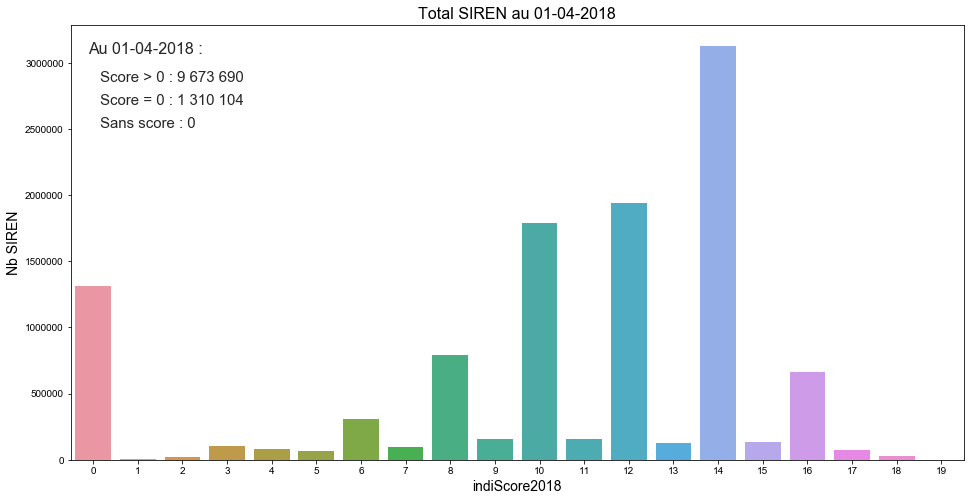

In [4]:
myTitre = 'Total SIREN au ' + DTREF.strftime('%d-%m-%Y')
col1 = 'indiScore' + str(DTREF.year)
n1 = '{:,}'.format(len(df[df[col1]>0])).replace(',', ' ')
n2 = '{:,}'.format(len(df[df[col1]==0])).replace(',', ' ')
n3 = '{:,}'.format(len(df[df[col1].isnull()])).replace(',', ' ')

stats = df[df[col1].notnull()].groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
stats[col1] = stats[col1].astype('int64')
display(stats)

fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(stats[col1], stats.siren)
plt.title(myTitre, fontsize=16)
plt.xlabel(col1, fontsize=14)
plt.ylabel('Nb SIREN', fontsize=14)
sns.set_style('dark')
fig.text(.14, .85, 'Au '+DTREF.strftime('%d-%m-%Y')+' :', ha='left', va='top', size=16)
fig.text(.15, .80, 'Score > 0 : '+n1, ha='left', va='top', size=15)
fig.text(.15, .76, 'Score = 0 : '+n2, ha='left', va='top', size=15)
fig.text(.15, .72, 'Sans score : '+n3, ha='left', va='top', size=15)
plt.show()
fig.savefig(myTitre + '.png')


In [41]:
dt0 = datetime(DTREF.year, DTREF.month, DTREF.day)
col0 = 'indiScore' + str(dt0.year)
procol0 = 'procol' + str(dt0.year)
dt1 = datetime(DTREF.year-1, DTREF.month, DTREF.day)
col1 = 'indiScore' + str(dt1.year)
tmp = df[['siren', col1, col0, procol0, 'lastTypeEven']]
tmp = tmp[tmp[col1]>0]

stats = tmp.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
stats[col1] = stats[col1].astype('int64')
#display(stats)

dfzero = tmp[(tmp[col0]==0) & (tmp[procol0]!='A')]
print(tmp.shape)
print(dfzero.shape)
print(tmp[(tmp[col0]==0)].shape)

dfabs = tmp[(tmp[col0]==0)]
statsabs = dfabs.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
#display(statsabs)

statszero = dfzero.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
statszero = statszero.rename(columns = {'siren':'sirenScore0'})
statszero[col1] = statszero[col1].astype('int64')

stats = stats.merge(statszero)
stats['pourcent'] = round(stats['sirenScore0'] / stats['siren'] * 100, 2)
display(stats)

statsabs = statsabs.rename(columns = {'siren':'sirenScore0'})
statsabs[col1] = statsabs[col1].astype('int64')

stats2 = tmp.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
stats2[col1] = stats2[col1].astype('int64')
stats2 = stats2.merge(statsabs)
stats2['pourcent'] = round(stats2['sirenScore0'] / stats2['siren'] * 100, 2)
display(stats2)


(2654617, 5)
(166908, 5)
(167887, 5)


,indiScore2017,siren,sirenScore0,pourcent
0,1,3116,925,29.69
1,2,16845,2946,17.49
2,3,64501,9912,15.37
3,4,56751,7530,13.27
4,5,41175,4702,11.42
5,6,179616,17664,9.83
6,7,51525,5135,9.97
7,8,327329,25731,7.86
8,9,96951,6859,7.07
9,10,554608,34879,6.29


,indiScore2017,siren,sirenScore0,pourcent
0,1,3116,925,29.69
1,2,16845,2951,17.52
2,3,64501,9939,15.41
3,4,56751,7542,13.29
4,5,41175,4724,11.47
5,6,179616,17700,9.85
6,7,51525,5164,10.02
7,8,327329,25783,7.88
8,9,96951,6944,7.16
9,10,554608,34952,6.30


In [28]:
print(dfzero[(dfzero['lastTypeEven'].notnull() & dfzero['lastTypeEven'].str.contains('2720'))].shape)
print(dfzero[(dfzero['lastTypeEven'].notnull() & dfzero['lastTypeEven'].str.contains('2725'))].shape)
dfzero[(dfzero['lastTypeEven'].notnull() & (dfzero['lastTypeEven'].str.contains('2720') | dfzero['lastTypeEven'].str.contains('2725')))]


(369, 5)
(16, 5)


,siren,indiScore2017,indiScore2018,procol2018,lastTypeEven
14819,35680156,12.0,0,R,"2720,6700"
91205,300577293,6.0,0,R,"5700;5900;2726,6700,2720"
101567,301896478,9.0,0,R,"2720,6700"
104184,302208855,14.0,0,R,"6700,5503;5001;2725"
105715,302396007,5.0,0,NaN,"6700,2720"
117296,303775381,11.0,0,R,"6700,2720"
126873,304971641,8.0,0,D,"5503;5002,5503;5000;2316,2313,5503;5001;2725,2..."
128564,305146664,19.0,0,R,"5503;5000;2316;2725,6700"
131493,305444762,18.0,0,R,"6700,2720"
132802,305588691,12.0,0,R,"2720,6700"


## Historique des SIREN tombés à 0

In [67]:
def make_stats(p_df, p_annee, p_duree=1):
    dt0 = datetime(DTREF.year-p_annee, DTREF.month, DTREF.day)
    col0 = 'indiScore' + str(dt0.year)
    procol0 = 'procol' + str(dt0.year)
    dt1 = datetime(DTREF.year-p_annee-p_duree, DTREF.month, DTREF.day)
    col1 = 'indiScore' + str(dt1.year)

    myTitre = 'Total SIREN avec un score positif au ' + dt1.strftime('%d-%m-%Y')
    tmp = p_df[['siren', col1, col0, procol0, 'lastTypeEven']]
    tmp = tmp[tmp[col1]>0]

    n1 = '{:,}'.format(len(tmp)).replace(',', ' ')
    n2 = '{:,}'.format(len(p_df[p_df[col1]==0])).replace(',', ' ')
    n3 = '{:,}'.format(len(p_df[p_df[col1].isnull()])).replace(',', ' ')
    
    print(n1, myTitre)
    print(n2, 'SIREN avec un score à 0 au ' + dt1.strftime('%d-%m-%Y'))
    print(n3, 'SIREN sans score au ' + dt1.strftime('%d-%m-%Y'))
    #display(tmp.head())
    
    stats = tmp.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
    stats[col1] = stats[col1].astype('int64')
    #display(stats)
    
    # Graphique 1 : Stats globales
    if p_duree==1:
        fig, ax = plt.subplots(figsize=(16, 8))
        sns.barplot(stats[col1], stats.siren)
        plt.title(myTitre, fontsize=16)
        plt.xlabel(col1, fontsize=14)
        plt.ylabel('Nb SIREN', fontsize=14)
        sns.set_style('dark')
        fig.text(.14, .85, 'Au '+dt1.strftime('%d-%m-%Y')+' :', ha='left', va='top', size=16)
        fig.text(.15, .80, 'Score > 0 : '+n1, ha='left', va='top', size=15)
        fig.text(.15, .76, 'Score = 0 : '+n2, ha='left', va='top', size=15)
        fig.text(.15, .72, 'Sans score : '+n3, ha='left', va='top', size=15)
        plt.show()
        fig.savefig(myTitre + '.png')
    
    # Scores tombés à 0 mais pas en absorption
    myTitre += ' et un score à 0 au ' + dt0.strftime('%d-%m-%Y') + ' (hors absorption)'
    dfzero = tmp[(tmp[col0]==0)]
    n5 = '{:,}'.format(len(dfzero)).replace(',', ' ')
    dfzero = dfzero[(dfzero[procol0]!='A')]
    dfzero = dfzero[~(dfzero['lastTypeEven'].notnull() & (dfzero['lastTypeEven'].str.contains('2620') | 
                                                          dfzero['lastTypeEven'].str.contains('2621') | 
                                                          dfzero['lastTypeEven'].str.contains('2720') | 
                                                          dfzero['lastTypeEven'].str.contains('2725') | 
                                                          dfzero['lastTypeEven'].str.contains('5700') | 
                                                          dfzero['lastTypeEven'].str.contains('5500') | 
                                                          dfzero['lastTypeEven'].str.contains('5501') | 
                                                          dfzero['lastTypeEven'].str.contains('5502') | 
                                                          dfzero['lastTypeEven'].str.contains('5503') | 
                                                          dfzero['lastTypeEven'].str.contains('5510')))]

    n4 = '{:,}'.format(len(dfzero)).replace(',', ' ')
    print(n4, myTitre)

    statszero = dfzero.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
    statszero = statszero.rename(columns = {'siren':'sirenScore0'})
    statszero[col1] = statszero[col1].astype('int64')

    # Pour comparer on regarde ici les scores à 0 absorptions comprises
    dfabs = tmp[(tmp[col0]==0)]
    statsabs = dfabs.groupby(col1)['siren'].aggregate('count').reset_index().sort_values(col1, ascending=True)
    statsabs = statsabs.rename(columns = {'siren':'sirenabsScore0'})
    statsabs[col1] = statsabs[col1].astype('int64')
    
    # Graphique 2 : Siren tombés à 0
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(statsabs[col1], statsabs['sirenabsScore0'], color='k', label="Part des absorptions")
    sns.barplot(statszero[col1], statszero['sirenScore0'])
    plt.legend()
    plt.xlabel(col1, fontsize=14)
    plt.ylabel('Nb SIREN', fontsize=14)
    plt.title(myTitre, fontsize=16)
    fig.text(.14, .85, 'Total : '+n5, ha='left', va='top', size=16)
    fig.text(.14, .80, 'Total hors absorption : '+n4, ha='left', va='top', size=16)
    plt.show()
    fig.savefig(myTitre + '.png')

    stats = stats.merge(statszero)
    stats['pourcent'] = round(stats['sirenScore0'] / stats['siren'] * 100, 2)
    stats = stats.merge(statsabs)
    stats['pourcentabs'] = round(stats['sirenabsScore0'] / stats['siren'] * 100, 2)
    display(stats)
    
    # Graphique 3 : Siren tombés à 0 - Pourcentage
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(stats[col1], stats['pourcentabs'], color='k', label="Part des absorptions")
    sns.barplot(stats[col1], stats['pourcent'])
    plt.legend()
    plt.xlabel(col1, fontsize=14)
    plt.ylabel('Pourcentage', fontsize=14)
    plt.title(myTitre + ' - Pourcentage', fontsize=16)
    plt.show()
    fig.savefig(myTitre + ' - Pourcentage' + '.png')
    
    if (p_annee == 0 & p_duree==1):
        print('SIREN passés de 19 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]>=19].siren))
        print('SIREN passés de 18 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]==18].siren))
        print('SIREN passés de 17 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]==17].siren))
        print('SIREN passés de 16 à 0 :')
        print(','.join(str(s) for s in dfzero[dfzero[col1]==16].siren))


2 654 617 Total SIREN avec un score positif au 01-04-2017
720 858 SIREN avec un score à 0 au 01-04-2017
7 608 319 SIREN sans score au 01-04-2017


,indiScore2017,siren
0,1,3116
1,2,16845
2,3,64501
3,4,56751
4,5,41175
5,6,179616
6,7,51525
7,8,327329
8,9,96951
9,10,554608


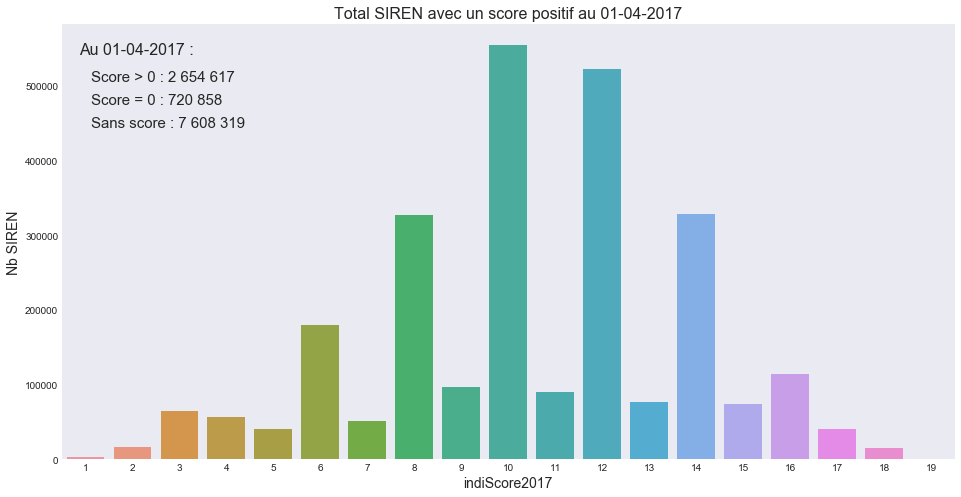

158 967 Total SIREN avec un score positif au 01-04-2017 et un score à 0 au 01-04-2018 (hors absorption)


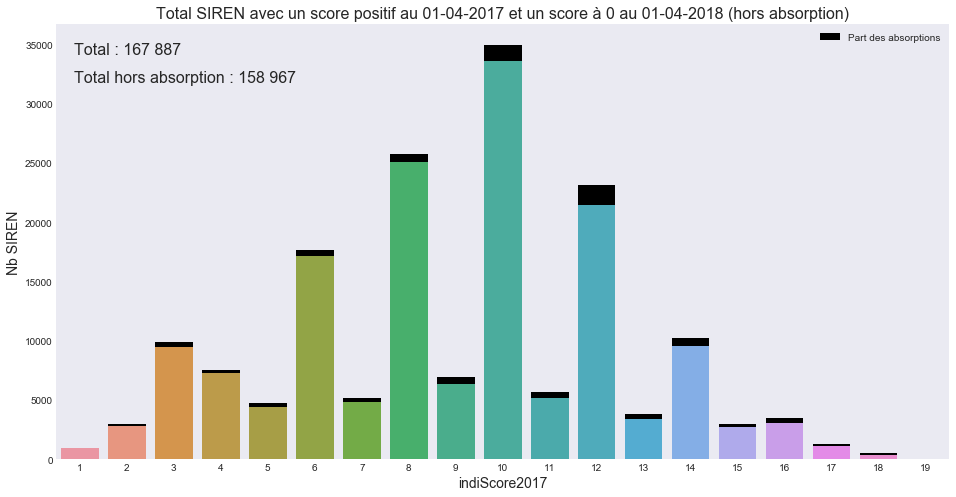

,indiScore2017,siren,sirenScore0,pourcent,sirenabsScore0,pourcentabs
0,1,3116,914,29.33,925,29.69
1,2,16845,2802,16.63,2951,17.52
2,3,64501,9456,14.66,9939,15.41
3,4,56751,7297,12.86,7542,13.29
4,5,41175,4432,10.76,4724,11.47
5,6,179616,17139,9.54,17700,9.85
6,7,51525,4828,9.37,5164,10.02
7,8,327329,25130,7.68,25783,7.88
8,9,96951,6388,6.59,6944,7.16
9,10,554608,33591,6.06,34952,6.30


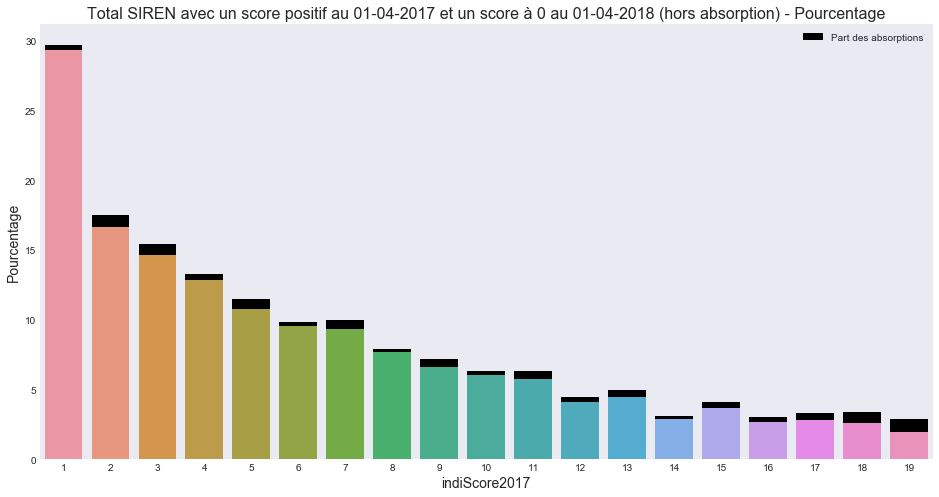

SIREN passés de 19 à 0 :
303494181,344397039,351576970,380414946,401667662,408255560,413952474,414660043,419752522,420511990,435037981,435782834,443457726,443736483,458505625,488842279,552137283,775604853,801075714
SIREN passés de 18 à 0 :
37021151,54500145,76920503,258100494,270100019,279400048,279400162,304043847,304392525,305148504,309231504,309872653,310190129,310718671,312056641,312801079,313052664,314708298,314747528,316680032,319466447,319537742,319597100,319626305,320975188,321190365,321618241,321814121,321995698,322214669,322911439,322916164,323109975,323722140,323840504,324593326,326613429,326860202,326889136,326943321,327832739,328061643,328936646,329032833,329667034,329804595,329829295,329937924,330055724,331748046,331749960,332181320,332461342,332683408,332900471,333461911,337679476,337687602,337744577,337866487,338226400,338377617,338656507,338839103,339189904,339707184,339727471,339883555,340335223,340526268,341242295,341687754,342383536,342387461,343121588,343335808,343

In [54]:
# On travaille sur les SIREN positifs 1 an avant
make_stats(df, 0)

1 211 807 Total SIREN avec un score positif au 01-04-2016
341 904 SIREN avec un score à 0 au 01-04-2016
9 430 083 SIREN sans score au 01-04-2016


,indiScore2016,siren
0,1,885
1,2,10412
2,3,39248
3,4,28485
4,5,25027
5,6,77238
6,7,29337
7,8,134098
8,9,62939
9,10,213391


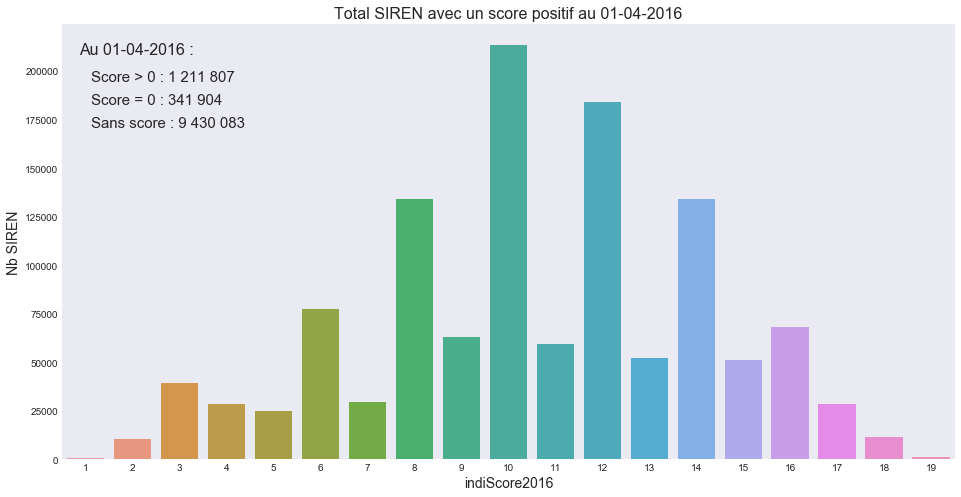

46 198 Total SIREN avec un score positif au 01-04-2016 et un score à 0 au 01-04-2017 (hors absorption)


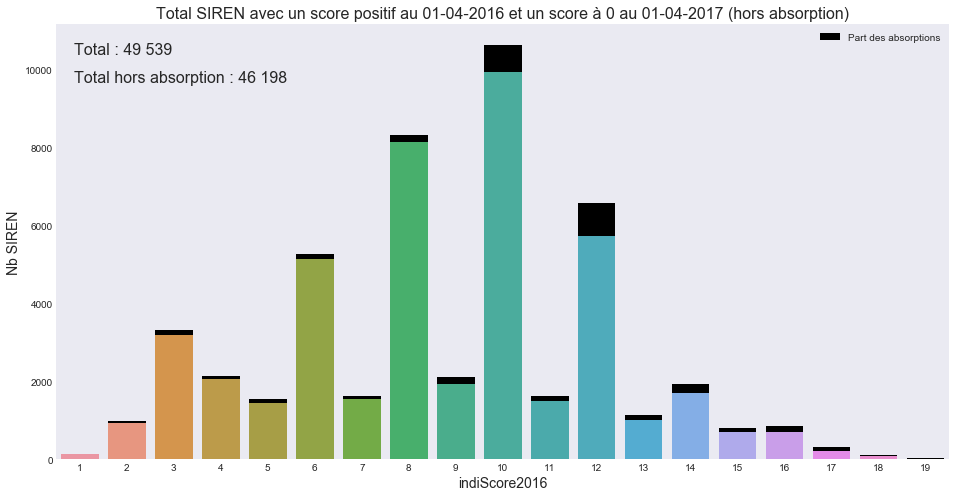

,indiScore2016,siren,sirenScore0,pourcent,sirenabsScore0,pourcentabs
0,1,885,148,16.72,149,16.84
1,2,10412,944,9.07,978,9.39
2,3,39248,3195,8.14,3317,8.45
3,4,28485,2071,7.27,2135,7.50
4,5,25027,1450,5.79,1537,6.14
5,6,77238,5153,6.67,5282,6.84
6,7,29337,1550,5.28,1626,5.54
7,8,134098,8144,6.07,8337,6.22
8,9,62939,1936,3.08,2102,3.34
9,10,213391,9950,4.66,10642,4.99


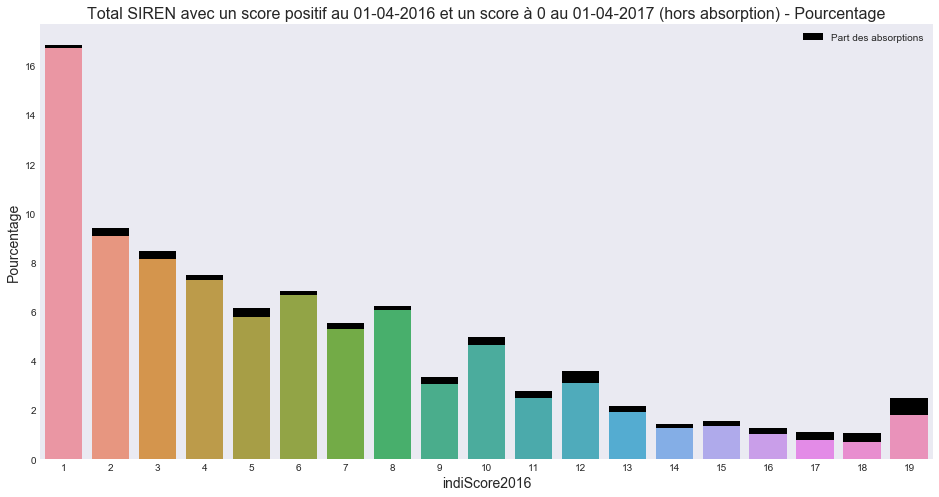

In [55]:
make_stats(df, 1)

698 434 Total SIREN avec un score positif au 01-04-2015
260 602 SIREN avec un score à 0 au 01-04-2015
10 024 758 SIREN sans score au 01-04-2015


,indiScore2015,siren
0,1,445
1,2,6394
2,3,28872
3,4,14501
4,5,34102
5,6,39583
6,7,30941
7,8,39538
8,9,54313
9,10,74444


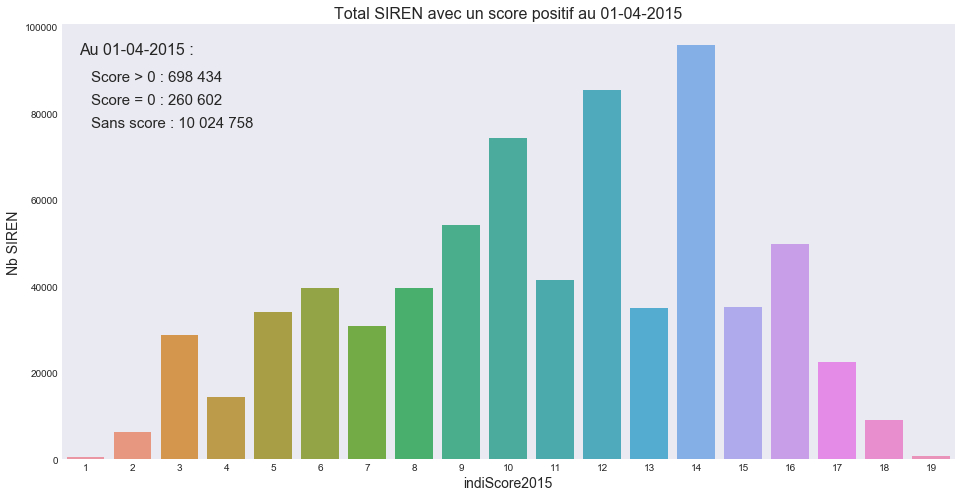

35 604 Total SIREN avec un score positif au 01-04-2015 et un score à 0 au 01-04-2016 (hors absorption)


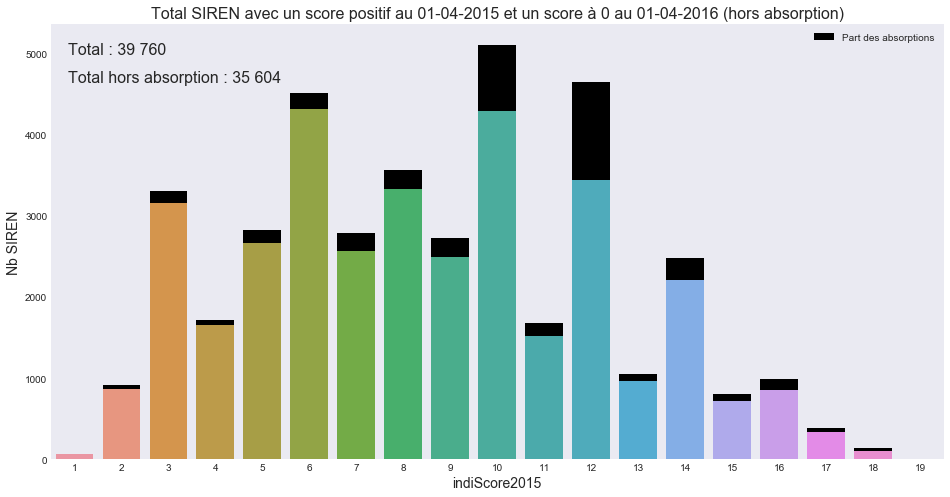

,indiScore2015,siren,sirenScore0,pourcent,sirenabsScore0,pourcentabs
0,1,445,66,14.83,66,14.83
1,2,6394,871,13.62,914,14.29
2,3,28872,3166,10.97,3315,11.48
3,4,14501,1655,11.41,1721,11.87
4,5,34102,2673,7.84,2831,8.30
5,6,39583,4326,10.93,4521,11.42
6,7,30941,2571,8.31,2787,9.01
7,8,39538,3335,8.43,3564,9.01
8,9,54313,2500,4.60,2734,5.03
9,10,74444,4290,5.76,5108,6.86


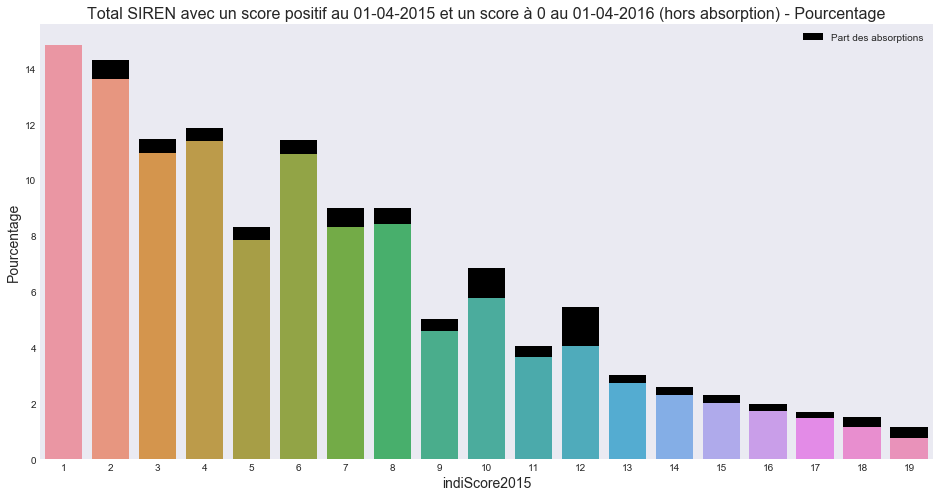

In [56]:
make_stats(df, 2)

552 411 Total SIREN avec un score positif au 01-04-2014
200 007 SIREN avec un score à 0 au 01-04-2014
10 231 376 SIREN sans score au 01-04-2014


,indiScore2014,siren
0,1,416
1,2,8846
2,3,26436
3,4,11629
4,5,18291
5,6,28811
6,7,25614
7,8,35075
8,9,41994
9,10,58009


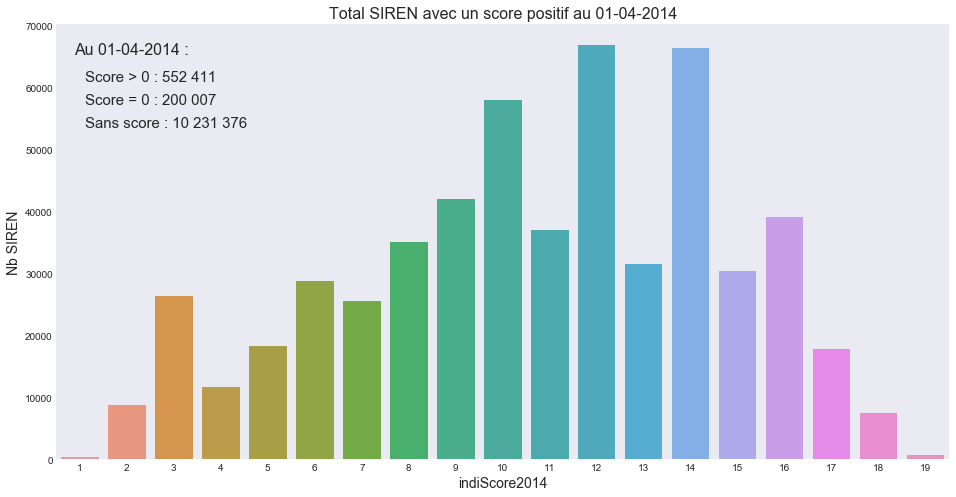

27 097 Total SIREN avec un score positif au 01-04-2014 et un score à 0 au 01-04-2015 (hors absorption)


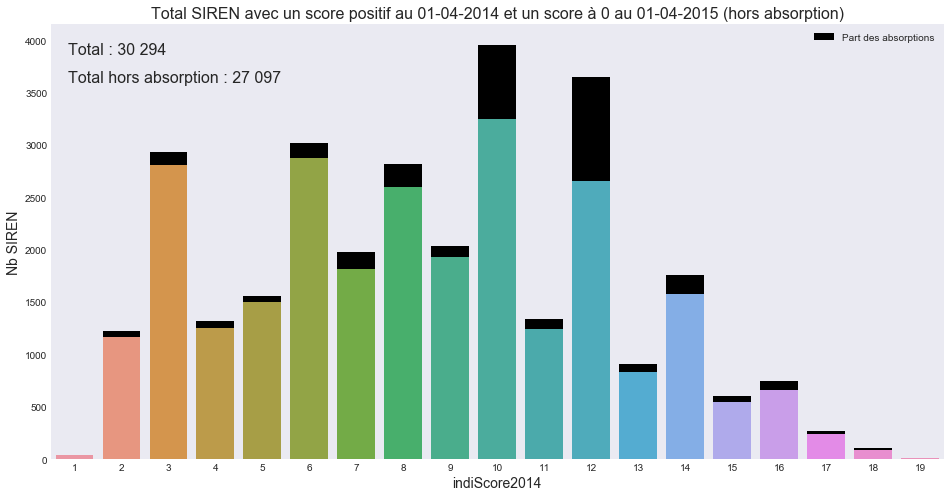

,indiScore2014,siren,sirenScore0,pourcent,sirenabsScore0,pourcentabs
0,1,416,40,9.62,40,9.62
1,2,8846,1171,13.24,1229,13.89
2,3,26436,2810,10.63,2934,11.10
3,4,11629,1257,10.81,1320,11.35
4,5,18291,1498,8.19,1563,8.55
5,6,28811,2872,9.97,3015,10.46
6,7,25614,1820,7.11,1976,7.71
7,8,35075,2596,7.40,2819,8.04
8,9,41994,1927,4.59,2036,4.85
9,10,58009,3244,5.59,3953,6.81


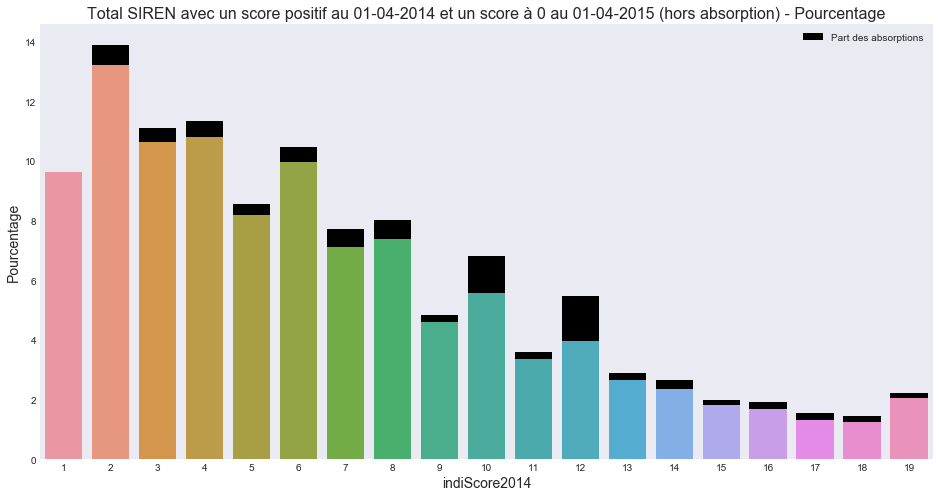

In [57]:
make_stats(df, 3)

1 211 807 Total SIREN avec un score positif au 01-04-2016
341 904 SIREN avec un score à 0 au 01-04-2016
9 430 083 SIREN sans score au 01-04-2016


,indiScore2016,siren
0,1,885
1,2,10412
2,3,39248
3,4,28485
4,5,25027
5,6,77238
6,7,29337
7,8,134098
8,9,62939
9,10,213391


117 216 Total SIREN avec un score positif au 01-04-2016 et un score à 0 au 01-04-2018 (hors absorption)


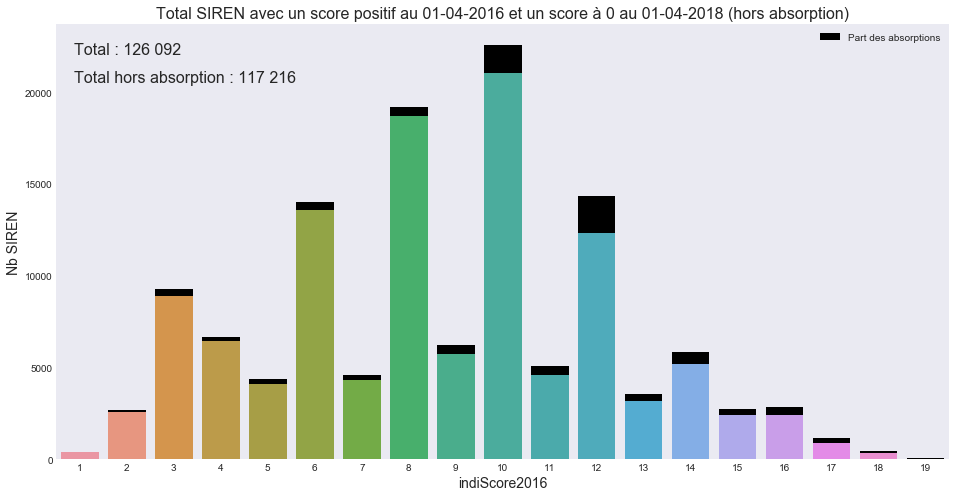

,indiScore2016,siren,sirenScore0,pourcent,sirenabsScore0,pourcentabs
0,1,885,399,45.08,401,45.31
1,2,10412,2571,24.69,2683,25.77
2,3,39248,8875,22.61,9276,23.63
3,4,28485,6468,22.71,6651,23.35
4,5,25027,4083,16.31,4356,17.41
5,6,77238,13590,17.59,13999,18.12
6,7,29337,4343,14.80,4615,15.73
7,8,134098,18696,13.94,19214,14.33
8,9,62939,5722,9.09,6253,9.94
9,10,213391,21062,9.87,22568,10.58


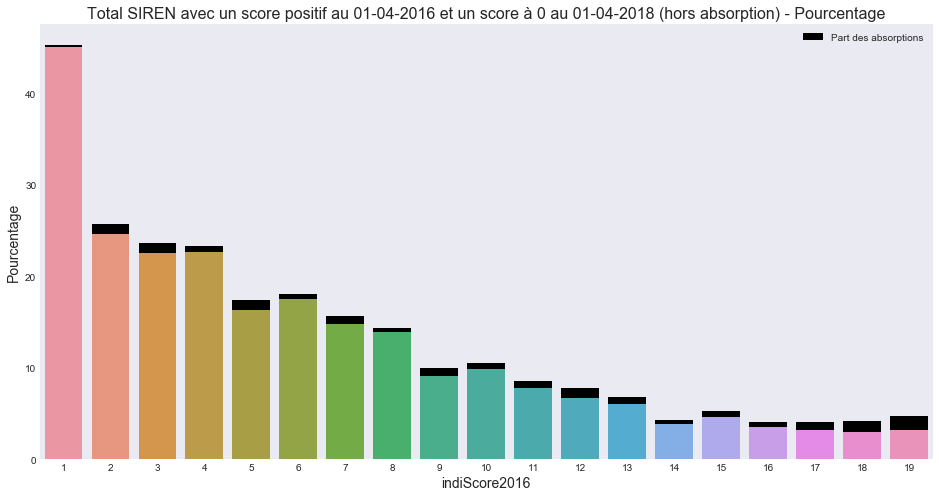

In [64]:
# On travaille sur les SIREN positifs 2 ans avant
make_stats(df, 0, 2)

698 434 Total SIREN avec un score positif au 01-04-2015
260 602 SIREN avec un score à 0 au 01-04-2015
10 024 758 SIREN sans score au 01-04-2015
78 292 Total SIREN avec un score positif au 01-04-2015 et un score à 0 au 01-04-2018 (hors absorption)


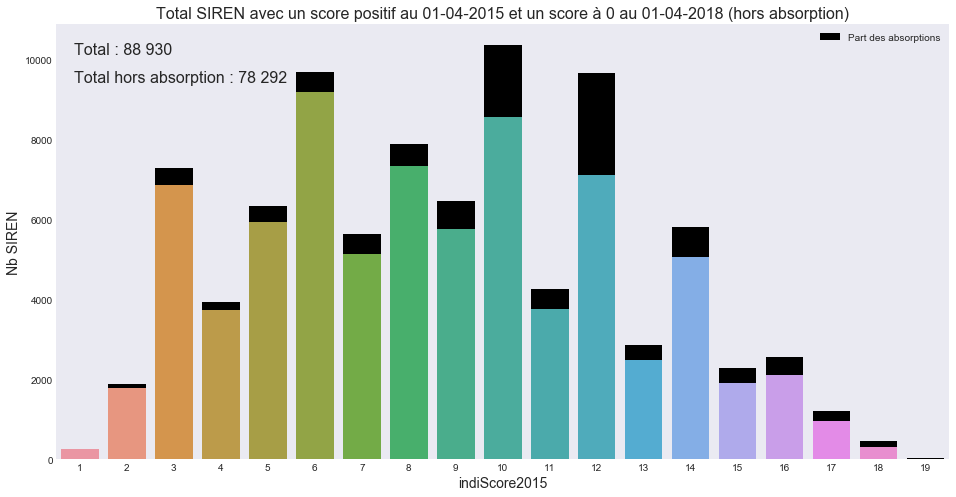

,indiScore2015,siren,sirenScore0,pourcent,sirenabsScore0,pourcentabs
0,1,445,254,57.08,256,57.53
1,2,6394,1778,27.81,1892,29.59
2,3,28872,6871,23.80,7288,25.24
3,4,14501,3733,25.74,3935,27.14
4,5,34102,5930,17.39,6347,18.61
5,6,39583,9200,23.24,9703,24.51
6,7,30941,5140,16.61,5645,18.24
7,8,39538,7344,18.57,7899,19.98
8,9,54313,5768,10.62,6478,11.93
9,10,74444,8561,11.50,10370,13.93


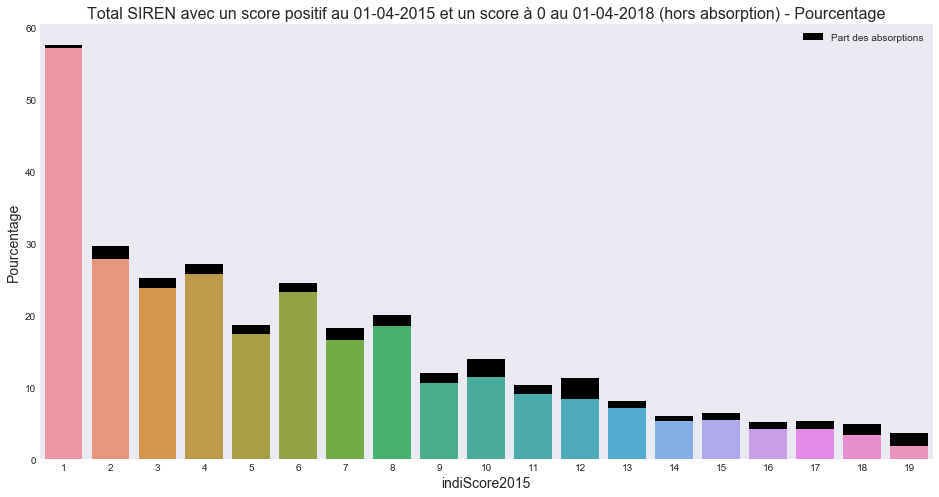

In [68]:
# On travaille sur les SIREN positifs 3 ans avant
make_stats(df, 0, 3)